In [26]:
import os
import json
import jsonlines
import pandas as pd

In [31]:
# 1. octothinker-3b-long-zero在8192 context length上训练，4096上重新评估，所以pass@1比较差
# 2. 其他model都在1024下评估的

performance = {
    "Llama-3.2-3B-Base":{
        1: 0.0360859375, 
        2: 0.06786115196078434, 
        4: 0.12140798874597918, 
        8: 0.20154709211015287, 
        16: 0.30497577434672385, 
        32: 0.4196851849461804, 
        64: 0.5299987583546348, 
        128: 0.6234333981047271, 
        256: 0.694
    },
    "Llama-3.2-3B-Zero": {
        1: 0.0639296875, 
        2: 0.11194332107843137, 
        4: 0.18216603459962616, 
        8: 0.27366711553242296, 
        16: 0.3796040473709623, 
        32: 0.48731550588497863, 
        64: 0.5838328860460327, 
        128: 0.6629343594008473, 
        256: 0.724
    },
    "Octothinker-3B-Long-Base":{1: 0.19796875, 2: 0.28482591911764704, 4: 0.3773882502146544, 8: 0.47122934000801386, 16: 0.5611607347267137, 32: 0.6405003949813552, 64: 0.7052176200155279, 128: 0.7552486665953052, 256: 0.794},
    "Octothinker-3B-Long-Zero":{
        1: 0.541828125, 
        2: 0.6045671568627452, 
        4: 0.6550109103449664, 
        8: 0.697747205512706, 
        16: 0.7329579099222595, 
        32: 0.759988028532716, 
        64: 0.7811328695961209, 
        128: 0.8006368022261574, 
        256: 0.818
    }
}

color_mapping={
    "Llama-3.2-3B-Base": "#6FB9FF",
    "Llama-3.2-3B-Zero": "#6666FF",
    "Octothinker-3B-Long-Base": "#C411CF",
    "Octothinker-3B-Long-Zero": "#1b2b65",
}

/var/folders/ss/_kxc_zqj40nd0k2nxkqcknxh0000gn/T/ipykernel_23050/218037529.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


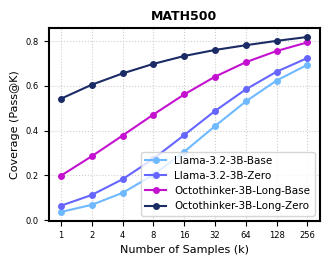

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Use logarithmic scale for x-axis and custom marker size
fig = plt.figure(figsize=(3.5, 2.5))
ax = fig.add_subplot(111)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

for model_name, data in performance.items():
    x = list(data.keys())
    y = list(data.values())
    ax.plot(x, y, marker='o', markersize=4, label=model_name, color=color_mapping.get(model_name, None))

# set label fontsize
ax.set_xscale('log', base=2)
ax.set_xticks(
    [1, 2, 4, 8, 16, 32, 64, 128, 256], 
    labels=[str(i) for i in [1, 2, 4, 8, 16, 32, 64, 128, 256]],
    fontsize=6
)
ax.set_yticks(
    [0.0, 0.2, 0.4, 0.6, 0.8],
    labels=[str(i) for i in [0.0, 0.2, 0.4, 0.6, 0.8]],
    fontsize=6
)
ax.set_xlabel("Number of Samples (k)", fontsize=8)
ax.set_ylabel("Coverage (Pass@K)", fontsize=8)
ax.legend(loc='lower right', fontsize=7.5)
ax.set_title("MATH500", fontsize=9, fontweight='bold')
ax.grid(True, linestyle=':', alpha=0.6)
fig.savefig("../figures/pass@k.png", bbox_inches='tight', pad_inches=0.05, dpi=300)
fig.show()
